**<center><font size = "6">Hyperparameters Multinominal Naive Bayes<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parámetros-por-defecto" data-toc-modified-id="Parámetros-por-defecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parámetros por defecto</a></span></li><li><span><a href="#Alpha-=-0.5" data-toc-modified-id="Alpha-=-0.5-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Alpha = 0.5</a></span></li><li><span><a href="#Alpha-=-0.0-(WORST-RESULTS)" data-toc-modified-id="Alpha-=-0.0-(WORST-RESULTS)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Alpha = 0.0 (WORST RESULTS)</a></span></li><li><span><a href="#Alpha-=-1.0,-fit_prior=False" data-toc-modified-id="Alpha-=-1.0,-fit_prior=False-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Alpha = 1.0, fit_prior=False</a></span></li><li><span><a href="#Alpha-=-0.5,-fit_prior=False" data-toc-modified-id="Alpha-=-0.5,-fit_prior=False-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Alpha = 0.5, fit_prior=False</a></span></li><li><span><a href="#Alpha-=-1.0,-fit_prior=True,-class_prior=[2,5,93]-(BEST-RESULTS)" data-toc-modified-id="Alpha-=-1.0,-fit_prior=True,-class_prior=[2,5,93]-(BEST-RESULTS)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Alpha = 1.0, fit_prior=True, class_prior=[2,5,93] (BEST RESULTS)</a></span></li><li><span><a href="#Alpha-=-0.05,-fit_prior=False,-class_prior=[2,5,93]" data-toc-modified-id="Alpha-=-0.05,-fit_prior=False,-class_prior=[2,5,93]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Alpha = 0.05, fit_prior=False, class_prior=[2,5,93]</a></span></li></ul></div>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.multiclass import OneVsRestClassifier

import pickle
X_train_smt = pickle.load(open("saved_feats/X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/X_test", "rb"))
y_train_smt = pickle.load(open("saved_feats/y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/y_test", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

## Parámetros por defecto

In [2]:
clf_mnb = OneVsRestClassifier(MultinomialNB(
    alpha=1.0, fit_prior=True, class_prior=None))
clf_mnb.fit(X_train_smt, y_train_smt)
pred_mnb = clf_mnb.predict(X_test)
pred_prob_mnb = clf_mnb.predict_proba(X_test)

In [3]:
print('Predicted classes:', clf_mnb.classes_)
print('Average accuracy :', np.mean(pred_mnb == y_test)*100)
print('Train accuracy :', (clf_mnb.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 83.52011758221569
Train accuracy : 91.25254716361006
Test accuracy : 83.52011758221569

 CONFUSION MATRIX
[[  62   26   23]
 [  64   89   97]
 [ 193  494 4395]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.19      0.56      0.29       111
     Neutral       0.15      0.36      0.21       250
    Positive       0.97      0.86      0.92      5082

    accuracy                           0.84      5443
   macro avg       0.44      0.59      0.47      5443
weighted avg       0.92      0.84      0.87      5443



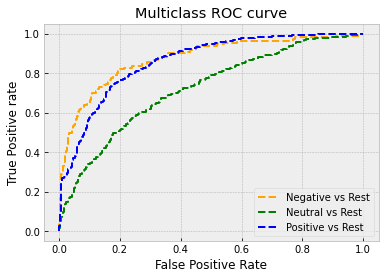

In [4]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb[:, 2], pos_label='Positive')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Alpha = 0.5

In [5]:
clf_mnb_2 = OneVsRestClassifier(MultinomialNB(
    alpha=0.5, fit_prior=True, class_prior=None))
clf_mnb_2.fit(X_train_smt, y_train_smt)
pred_mnb_2 = clf_mnb_2.predict(X_test)
pred_prob_mnb_2 = clf_mnb_2.predict_proba(X_test)

In [6]:
print('Predicted classes:', clf_mnb_2.classes_)
print('Average accuracy :', np.mean(pred_mnb_2 == y_test)*100)
print('Train accuracy :', (clf_mnb_2.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_2.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_2))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_2))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 83.72221201543266
Train accuracy : 91.663380003944
Test accuracy : 83.72221201543266

 CONFUSION MATRIX
[[  59   26   26]
 [  61   86  103]
 [ 186  484 4412]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.19      0.53      0.28       111
     Neutral       0.14      0.34      0.20       250
    Positive       0.97      0.87      0.92      5082

    accuracy                           0.84      5443
   macro avg       0.44      0.58      0.47      5443
weighted avg       0.92      0.84      0.87      5443



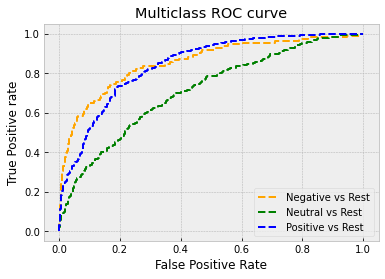

In [7]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_2[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_2[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_2[:, 2], pos_label='Positive')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Alpha = 0.0 (WORST RESULTS)

In [8]:
clf_mnb_3 = OneVsRestClassifier(MultinomialNB(
    alpha=1.0e-10, fit_prior=True, class_prior=None))
clf_mnb_3.fit(X_train_smt, y_train_smt)
pred_mnb_3 = clf_mnb_3.predict(X_test)
pred_prob_mnb_3 = clf_mnb_3.predict_proba(X_test)

In [9]:
clf_mnb_3.get_params()

{'estimator__alpha': 1e-10,
 'estimator__class_prior': None,
 'estimator__fit_prior': True,
 'estimator': MultinomialNB(alpha=1e-10),
 'n_jobs': None,
 'verbose': 0}

In [10]:
print('Predicted classes:', clf_mnb_3.classes_)
print('Average accuracy :', np.mean(pred_mnb_3 == y_test)*100)
print('Train accuracy :', (clf_mnb_3.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_3.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_3))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_3))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 84.18151754547125
Train accuracy : 92.94024847170184
Test accuracy : 84.18151754547125

 CONFUSION MATRIX
[[  24   21   66]
 [  29   62  159]
 [ 141  445 4496]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.12      0.22      0.16       111
     Neutral       0.12      0.25      0.16       250
    Positive       0.95      0.88      0.92      5082

    accuracy                           0.84      5443
   macro avg       0.40      0.45      0.41      5443
weighted avg       0.90      0.84      0.87      5443



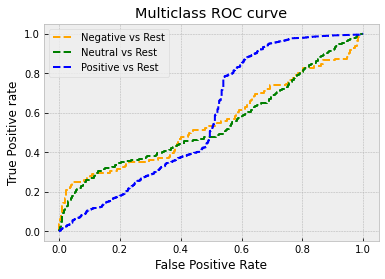

In [11]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_3[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_3[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_3[:, 2], pos_label='Positive')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Alpha = 1.0, fit_prior=False

In [12]:
clf_mnb_4 = OneVsRestClassifier(MultinomialNB(
    alpha=1.0, fit_prior=False, class_prior=None))
clf_mnb_4.fit(X_train_smt, y_train_smt)
pred_mnb_4 = clf_mnb_4.predict(X_test)
pred_prob_mnb_4 = clf_mnb_4.predict_proba(X_test)

In [13]:
print('Predicted classes:', clf_mnb_4.classes_)
print('Average accuracy :', np.mean(pred_mnb_4 == y_test)*100)
print('Train accuracy :', (clf_mnb_4.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_4.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_4))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_4))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 83.52011758221569
Train accuracy : 91.25254716361006
Test accuracy : 83.52011758221569

 CONFUSION MATRIX
[[  62   26   23]
 [  64   89   97]
 [ 193  494 4395]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.19      0.56      0.29       111
     Neutral       0.15      0.36      0.21       250
    Positive       0.97      0.86      0.92      5082

    accuracy                           0.84      5443
   macro avg       0.44      0.59      0.47      5443
weighted avg       0.92      0.84      0.87      5443



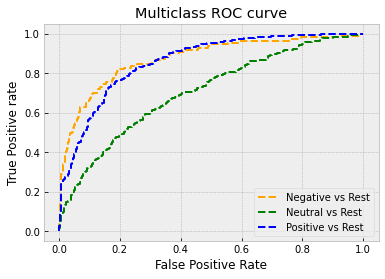

In [14]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_4[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_4[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_4[:, 2], pos_label='Positive')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Alpha = 0.5, fit_prior=False

In [15]:
clf_mnb_5 = OneVsRestClassifier(MultinomialNB(
    alpha=0.5, fit_prior=False, class_prior=None))
clf_mnb_5.fit(X_train_smt, y_train_smt)
pred_mnb_5 = clf_mnb_5.predict(X_test)
pred_prob_mnb_5 = clf_mnb_5.predict_proba(X_test)

In [16]:
print('Predicted classes:', clf_mnb_5.classes_)
print('Average accuracy :', np.mean(pred_mnb_5 == y_test)*100)
print('Train accuracy :', (clf_mnb_5.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_5.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_5))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_5))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 83.72221201543266
Train accuracy : 91.663380003944
Test accuracy : 83.72221201543266

 CONFUSION MATRIX
[[  59   26   26]
 [  61   86  103]
 [ 186  484 4412]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.19      0.53      0.28       111
     Neutral       0.14      0.34      0.20       250
    Positive       0.97      0.87      0.92      5082

    accuracy                           0.84      5443
   macro avg       0.44      0.58      0.47      5443
weighted avg       0.92      0.84      0.87      5443



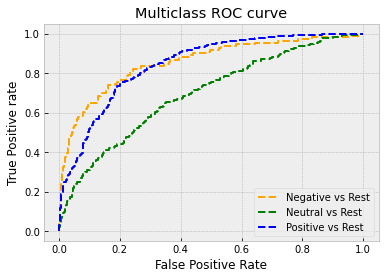

In [17]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_5[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_5[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_5[:, 2], pos_label='Positive')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Alpha = 1.0, fit_prior=True, class_prior=[2,5,93] (BEST RESULTS)

In [18]:
clf_mnb_6 = (MultinomialNB(alpha=1.0, fit_prior=True,
             class_prior=[0.2, 0.5, 0.93]))
clf_mnb_6.fit(X_train_smt, y_train_smt)
pred_mnb_6 = clf_mnb_6.predict(X_test)
pred_prob_mnb_6 = clf_mnb_6.predict_proba(X_test)

In [19]:
print('Predicted classes:', clf_mnb_6.classes_)
print('Average accuracy :', np.mean(pred_mnb_6 == y_test)*100)
print('Train accuracy :', (clf_mnb_6.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_6.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_6))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_6))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 90.63016718721293
Train accuracy : 87.72431473082233
Test accuracy : 90.63016718721293

 CONFUSION MATRIX
[[  34   28   49]
 [  20   88  142]
 [  23  248 4811]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.44      0.31      0.36       111
     Neutral       0.24      0.35      0.29       250
    Positive       0.96      0.95      0.95      5082

    accuracy                           0.91      5443
   macro avg       0.55      0.53      0.53      5443
weighted avg       0.92      0.91      0.91      5443



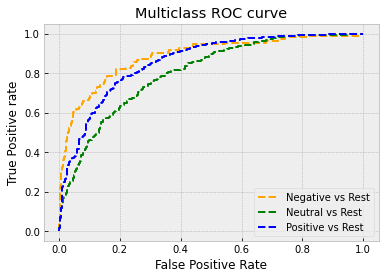

In [20]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_6[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_6[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_6[:, 2], pos_label='Positive')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Alpha = 0.5, fit_prior=True, class_prior=[2,5,93]

In [21]:
clf_mnb_7 = (MultinomialNB(alpha=0.5, fit_prior=True,
             class_prior=[0.2, 0.5, 0.93]))
clf_mnb_7.fit(X_train_smt, y_train_smt)
pred_mnb_7 = clf_mnb_7.predict(X_test)
pred_prob_mnb_7 = clf_mnb_7.predict_proba(X_test)

In [22]:
print('Predicted classes:', clf_mnb_7.classes_)
print('Average accuracy :', np.mean(pred_mnb_7 == y_test)*100)
print('Train accuracy :', (clf_mnb_7.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_7))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_7))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 90.35458386918978
Train accuracy : 88.64293696180899
Test accuracy : 83.52011758221569

 CONFUSION MATRIX
[[  32   29   50]
 [  20   81  149]
 [  27  250 4805]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.41      0.29      0.34       111
     Neutral       0.23      0.32      0.27       250
    Positive       0.96      0.95      0.95      5082

    accuracy                           0.90      5443
   macro avg       0.53      0.52      0.52      5443
weighted avg       0.92      0.90      0.91      5443



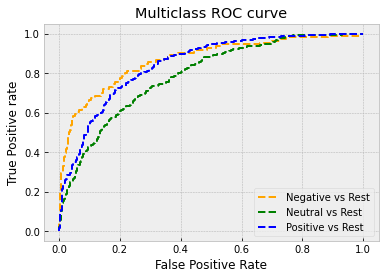

In [23]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_7[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_7[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_7[:, 2], pos_label='Positive')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')